In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import h5py as h5
import sys
from scipy.stats import binned_statistic
from scipy.stats.mstats import theilslopes
from importlib import reload
from pathlib import Path

sys.path.append('/reg/neh/home4/espov/python/datastorage/')
import datastorage

import ana_fun as ana
import bokeh
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

output_notebook()

matplotlib.rcParams['figure.figsize'] = (12, 7)
matplotlib.rc('font', size=20)
#matplotlib.rcParams['ax
#atplotlib.rcParams.keys()


Loading BokehJS ...

## Get data

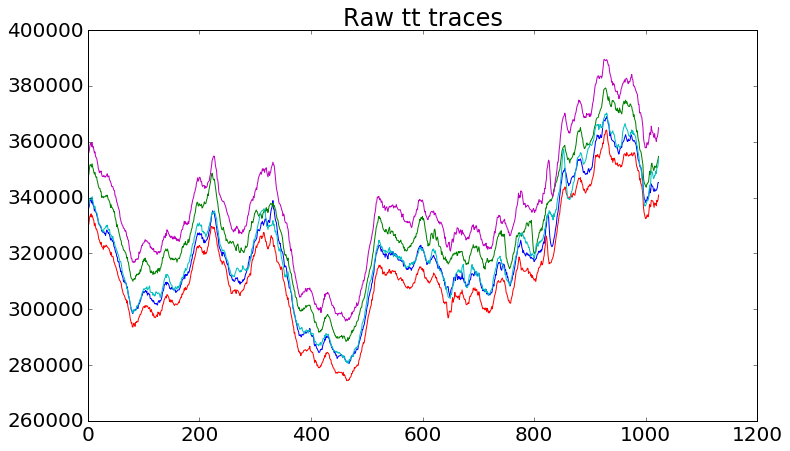

In [2]:
""" Get timing tool data """
h5path = Path('/reg/d/psdm/SXR/sxri0414/res/automated_analysis_espov/hdf5')
file = 'sxri0414run60.h5'
fh5 = h5.File(h5path / file)

file = str(h5path/file)
#file = '/reg/g/psdm/sw/hutch/sxd/analysis_methods/eigen_background_subtraction/xpptut15run420.h5'
data = datastorage.read(file)

ttdata = data.timeToolOpal

plt.plot(ttdata[:5,:].transpose())
plt.title('Raw tt traces')
plt.show()

## Get dropshots and apply svd on them

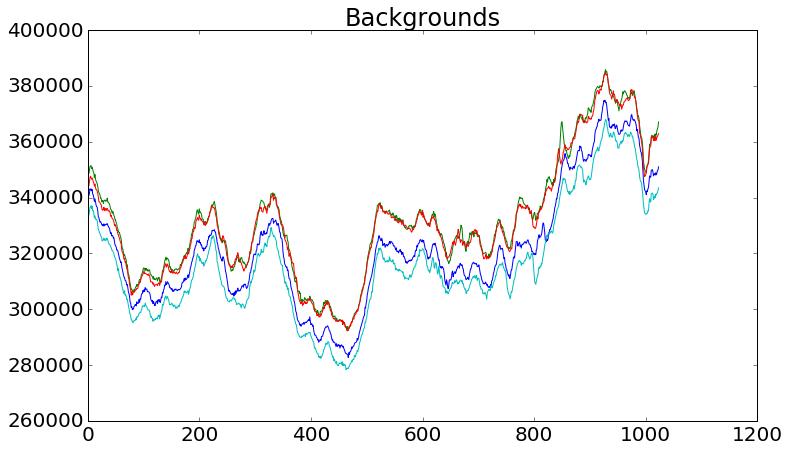

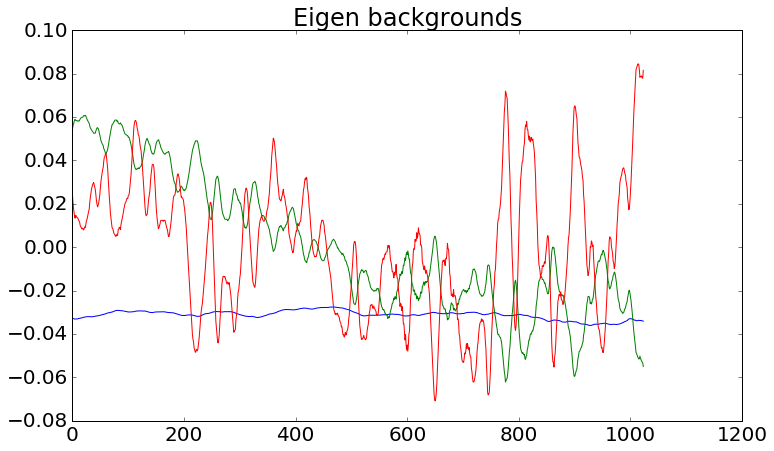

(15394, 1024)

In [3]:
u,s,v, bkgs = ana.get_svd_background(data, return_bkg=True)

plt.figure()
plt.title('Backgrounds')
plt.plot(bkgs[0])
plt.plot(bkgs[1])
plt.plot(bkgs[2])
plt.plot(bkgs[30])
plt.show()

plt.figure()
plt.title('Eigen backgrounds')
plt.plot(v[0])
plt.plot(v[1])
plt.plot(v[2])
#plt.plot(v[30])
plt.show()

bkgs.shape

## Subract svd background from timing tool traces

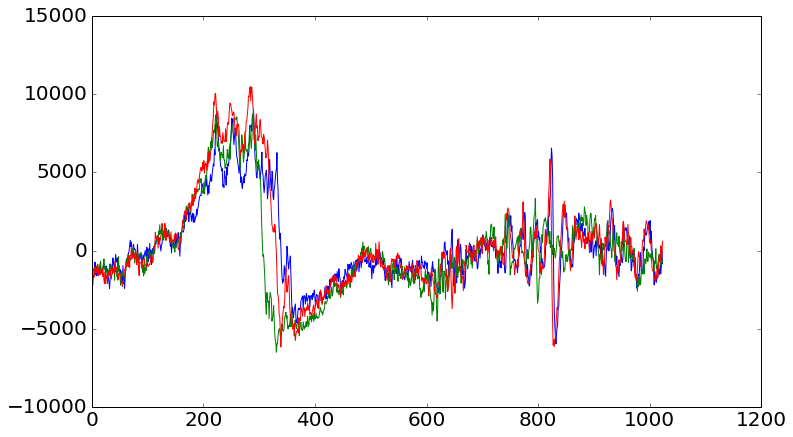

In [7]:
mask = ttdata.astype(bool)[1]
mask[200:600] = False

ttcorr = ana.subtract_svd_background(data, mask, svd_size=5)

plt.plot(ttcorr[:3].transpose())
plt.show()

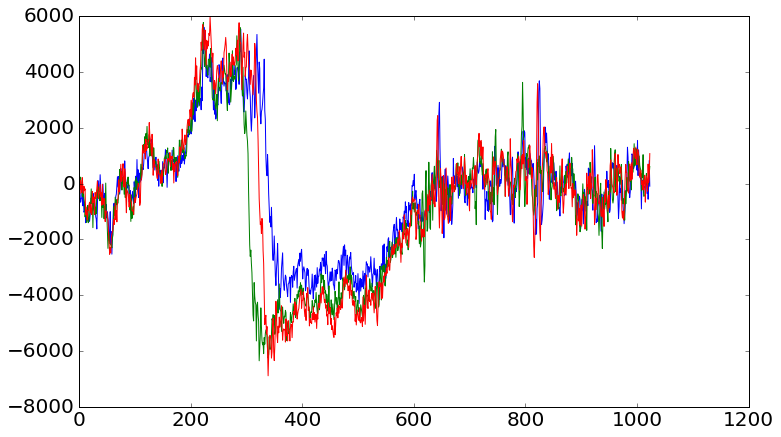

In [8]:
ttcorr = ana.subtract_svd_background(data, mask, svd_size=15)

plt.plot(ttcorr[:3].transpose())
plt.show()

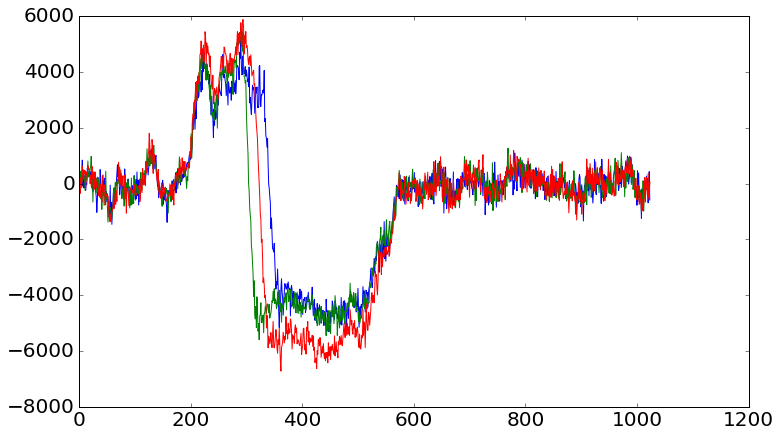

In [9]:
ttcorr = ana.subtract_svd_background(data, mask, svd_size=40)

plt.plot(ttcorr[:3].transpose())
plt.show()